In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading dataset
customer = pd.read_csv('/content/drive/My Drive/Score.csv')
customer.head()

<ipython-input-213-7874d7ded0b2>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  customer = pd.read_csv('/content/drive/My Drive/Score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
#Checking datatypes
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100003 non-null  object 
 1   Customer_ID               100003 non-null  object 
 2   Month                     100003 non-null  object 
 3   Name                      90018 non-null   object 
 4   Age                       100003 non-null  object 
 5   SSN                       100003 non-null  object 
 6   Occupation                100003 non-null  object 
 7   Annual_Income             100003 non-null  object 
 8   Monthly_Inhand_Salary     85001 non-null   float64
 9   Num_Bank_Accounts         100003 non-null  int64  
 10  Num_Credit_Card           100003 non-null  int64  
 11  Interest_Rate             100003 non-null  int64  
 12  Num_of_Loan               100003 non-null  object 
 13  Type_of_Loan              88595 non-null   o

In [ ]:
#Checking number of rows and columns
customer.shape

(100003, 28)

In [ ]:
#Checking null values
customer.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
print("Number of duplicate rows:",customer.duplicated().sum())

Number of duplicate rows: 3


In [ ]:
#Droping duplicate values
customer = customer.drop_duplicates()

In [ ]:
#Dropping column using domain knowledge
customer = customer.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN','Type_of_Loan'])

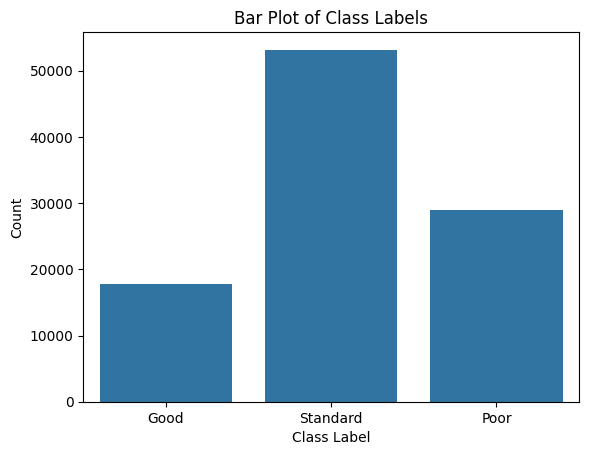

In [ ]:
#Checking class distribution of output feature
sns.countplot(x='Credit_Score', data=customer)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Bar Plot of Class Labels')
plt.show()

In [ ]:
customer['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [ ]:
customer['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
customer['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
customer['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
customer['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [ ]:
customer['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

occupation_mapping = {
    'Scientist': 1,
    'Teacher': 2,
    'Engineer': 3,
    'Entrepreneur': 4,
    'Developer': 5,
    'Lawyer': 6,
    'Media_Manager': 7,
    'Doctor': 8,
    'Journalist': 9,
    'Manager': 10,
    'Accountant': 11,
    'Musician': 12,
    'Mechanic': 13,
    'Writer': 14,
    'Architect': 15
}

payment_behaviour_mapping = {
    'High_spent_Small_value_payments': 1,
    'Low_spent_Large_value_payments': 2,
    'Low_spent_Medium_value_payments': 3,
    'Low_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 7
}

payment_of_min_ammount_mapping = {
    'No': 0,
    'NM': 1,
    'Yes': 2
}

credit_mix_mapping = {
    'Good': 1,
    'Standard': 2,
    'Bad': 3
}

credit_score_mapping = {
    'Good': 1,
    'Standard': 2,
    'Poor': 3
}

customer['Month'] = customer['Month'].map(month_mapping)
customer['Occupation'] = customer['Occupation'].map(occupation_mapping)
customer['Payment_Behaviour'] = customer['Payment_Behaviour'].map(payment_behaviour_mapping)
customer['Payment_of_Min_Amount'] = customer['Payment_of_Min_Amount'].map(payment_of_min_ammount_mapping)
customer['Credit_Mix'] = customer['Credit_Mix'].map(credit_mix_mapping)
customer['Credit_Score'] = customer['Credit_Score'].map(credit_score_mapping)

In [ ]:
def extract_years_months(text):
  if type(text) != float:
    parts = text.split()
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

customer['Credit_History_Age'] = customer['Credit_History_Age'].apply(extract_years_months)

In [ ]:
#Nulling non-numeric values
for i in customer:
  customer[i] = pd.to_numeric(customer[i], errors='coerce')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       95061 non-null   float64
 2   Occupation                92938 non-null   float64
 3   Annual_Income             93020 non-null   float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               95215 non-null   float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    90254 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   float64

<Axes: >

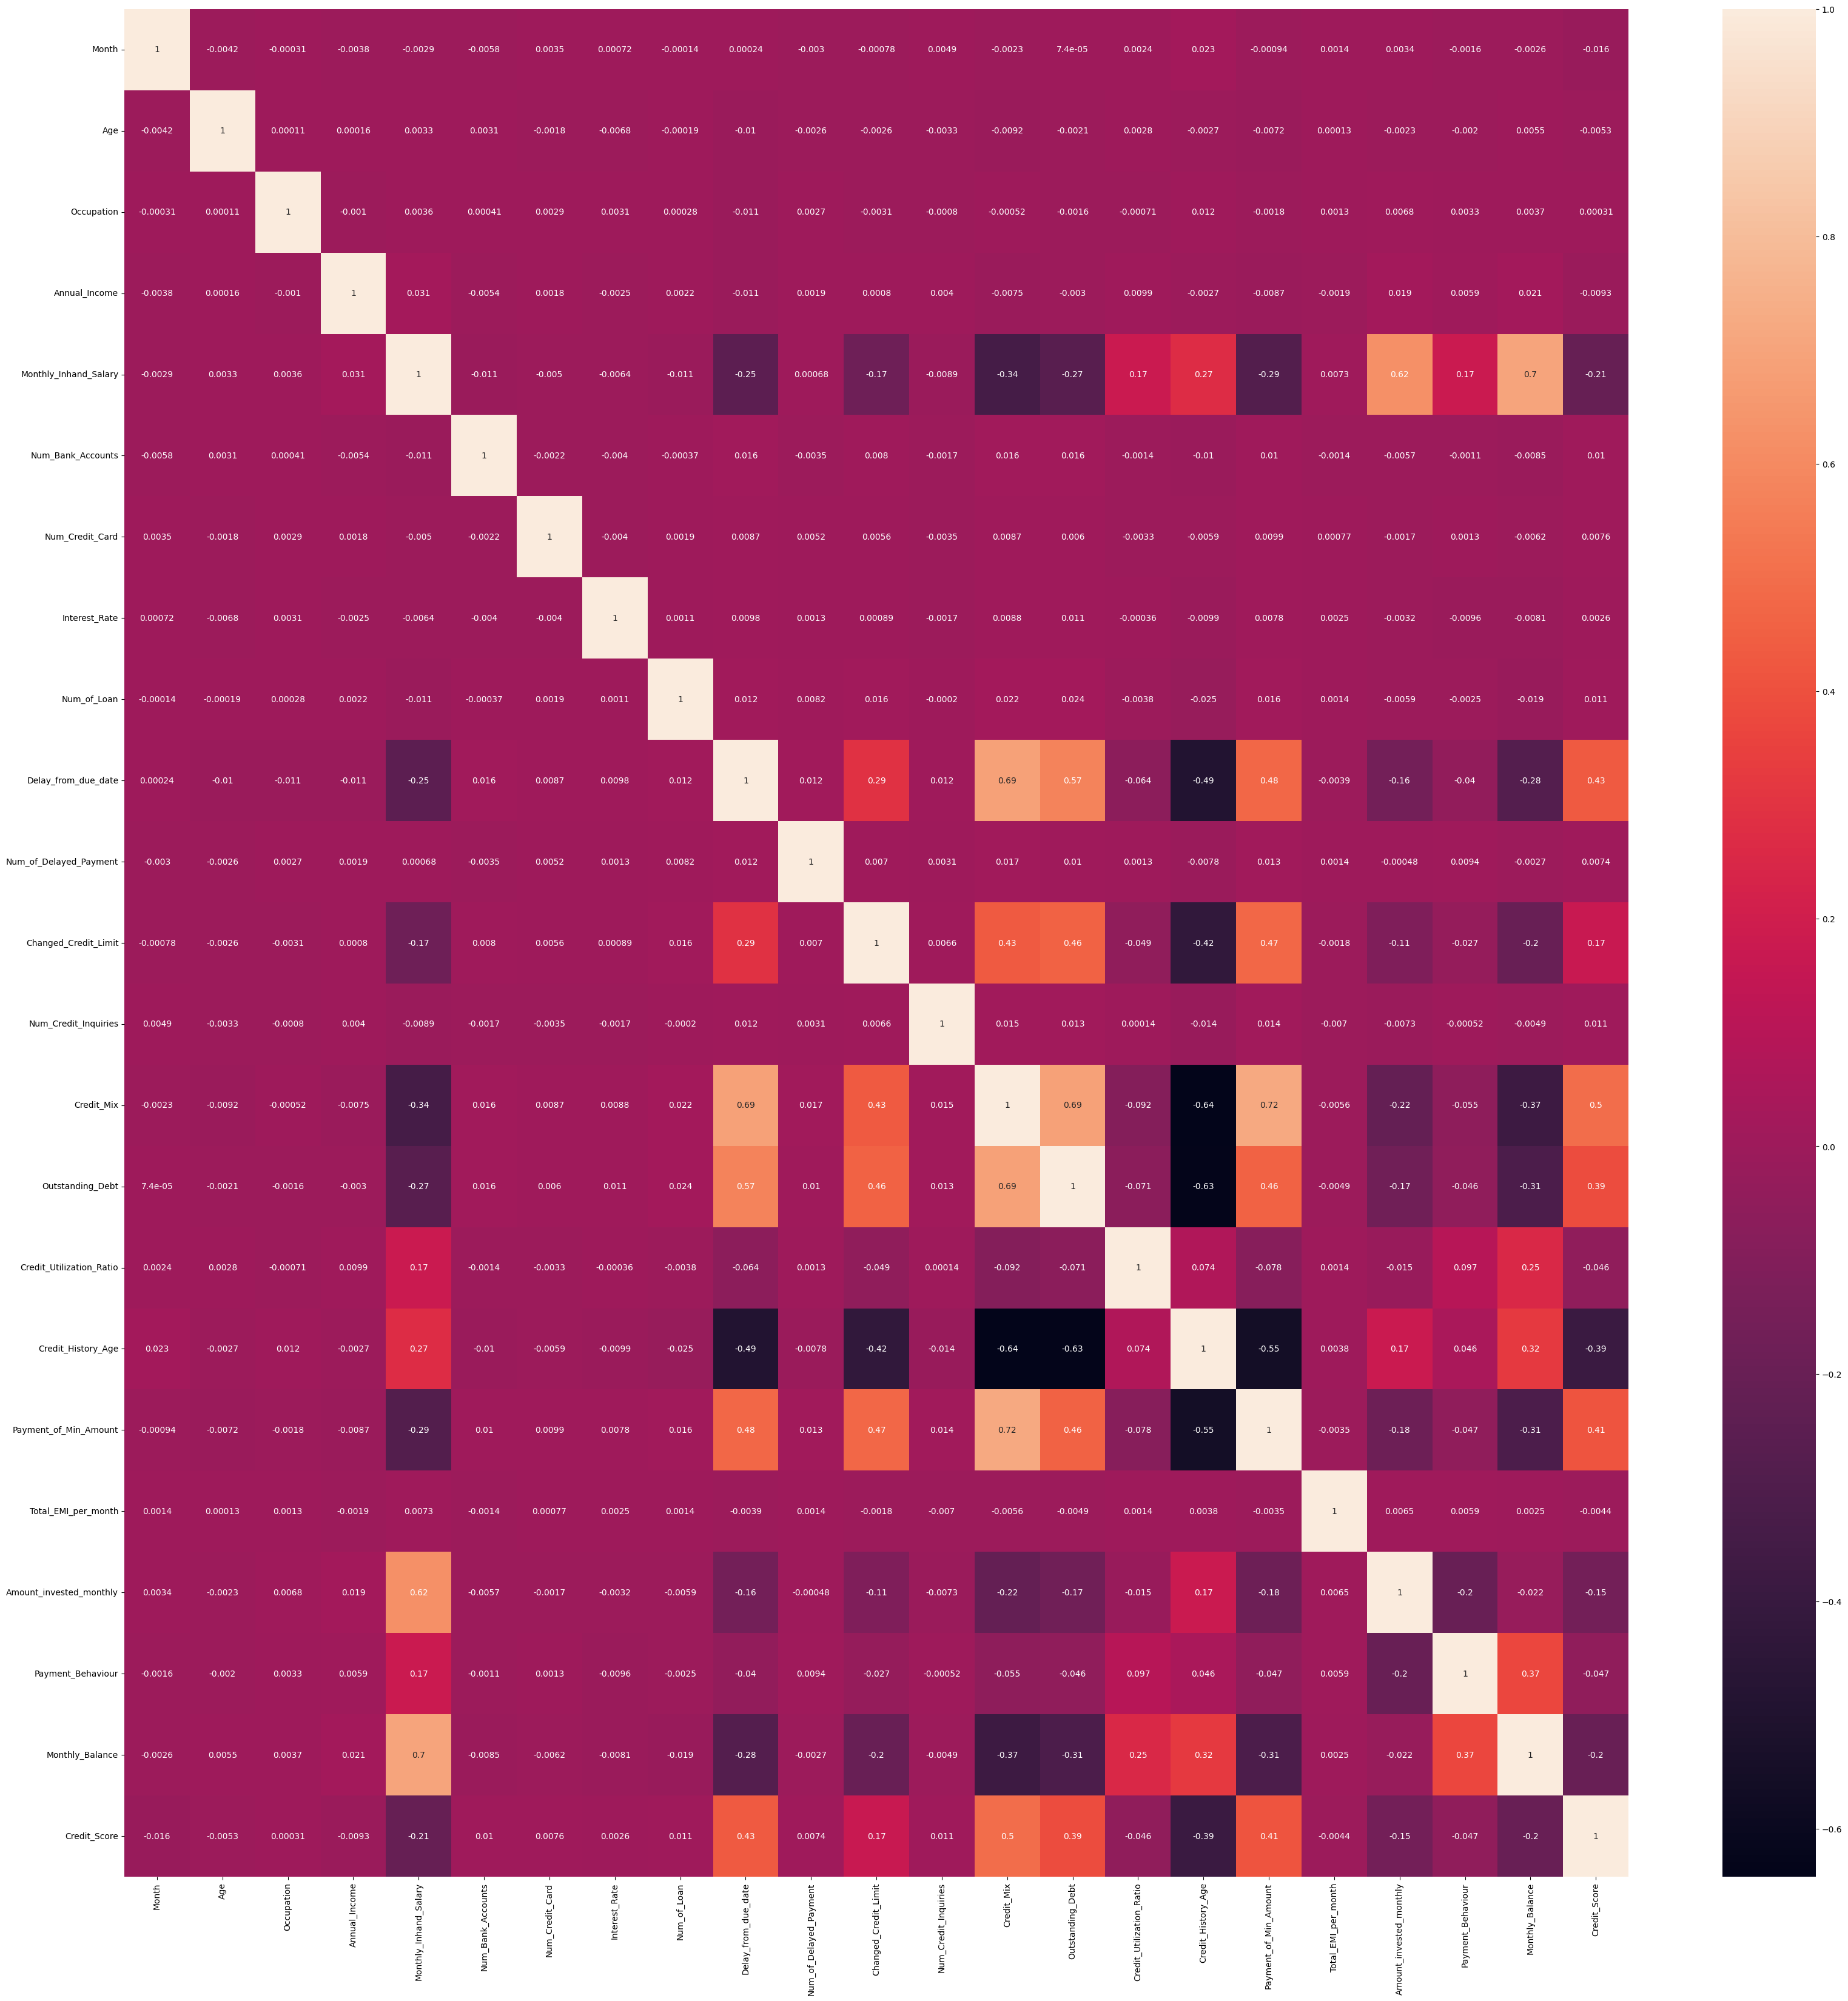

In [ ]:
customer_corr = customer.corr()
plt.figure(figsize = (40,40))
sns.heatmap(customer_corr, annot=True)

In [ ]:
# Filling null values
customer['Credit_Mix'].fillna(customer['Credit_Mix'].mode()[0], inplace=True)
customer['Payment_Behaviour'].fillna(customer['Payment_Behaviour'].mode()[0], inplace=True)
customer['Monthly_Inhand_Salary'].fillna(customer['Monthly_Inhand_Salary'].mean(), inplace=True)
customer['Changed_Credit_Limit'].fillna(customer['Changed_Credit_Limit'].mean(), inplace=True)
customer['Outstanding_Debt'].fillna(customer['Outstanding_Debt'].mean(), inplace=True)
customer['Credit_History_Age'].fillna(int(customer['Credit_History_Age'].mean()), inplace=True)
customer['Amount_invested_monthly'].fillna(customer['Amount_invested_monthly'].mean(), inplace=True)
customer['Monthly_Balance'].fillna(customer['Monthly_Balance'].mean(), inplace=True)
#Delay_from_due_date column has some -ve value which is not valid.
customer.loc[customer['Delay_from_due_date'] < 0, 'Delay_from_due_date'] = 0

In [ ]:
customer.isnull().sum()

Month                          0
Age                         4939
Occupation                  7062
Annual_Income               6980
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 4785
Delay_from_due_date            0
Num_of_Delayed_Payment      9746
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [ ]:
customer = customer.dropna()

In [ ]:
customer.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
customer.shape

(69242, 23)

In [ ]:
customer.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,69242.000000,69242.000000,69242.000000,6.924200e+04,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000,...,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000,69242.000000
mean,4.500303,111.423096,7.959143,1.781800e+05,4193.001373,17.272595,22.685740,75.363493,2.951446,21.082161,...,1.945293,1427.114928,32.295590,221.188874,1.168886,1382.644398,195.343441,3.905361,402.147242,2.112056
std,2.295146,689.813175,4.328537,1.447005e+06,2931.147330,118.647711,129.604564,478.218798,63.720073,14.839380,...,0.654566,1148.418595,5.112769,94.970938,0.922817,8212.298026,190.293903,1.726137,212.134491,0.675082
min,1.000000,-500.000000,1.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,0.000000,...,1.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.088628,1.000000
25%,3.000000,24.000000,4.000000,1.943560e+04,1790.980833,3.000000,4.000000,8.000000,1.000000,10.000000,...,2.000000,574.830000,28.071399,154.000000,0.000000,30.646720,76.663352,3.000000,270.701088,2.000000
50%,4.000000,33.000000,8.000000,3.757975e+04,3860.632500,6.000000,5.000000,13.000000,3.000000,18.000000,...,2.000000,1175.880000,32.324382,221.000000,2.000000,69.621222,143.387493,4.000000,338.451951,2.000000
75%,7.000000,42.000000,12.000000,7.276004e+04,5373.571667,7.000000,7.000000,20.000000,5.000000,28.000000,...,2.000000,1936.790000,36.502862,292.000000,2.000000,161.487532,219.641381,5.000000,467.316505,3.000000
max,8.000000,8698.000000,15.000000,2.419806e+07,15204.633330,1798.000000,1499.000000,5797.000000,1495.000000,67.000000,...,3.000000,4998.070000,50.000000,404.000000,2.000000,82256.000000,1977.326102,7.000000,1602.040519,3.000000


<Axes: >

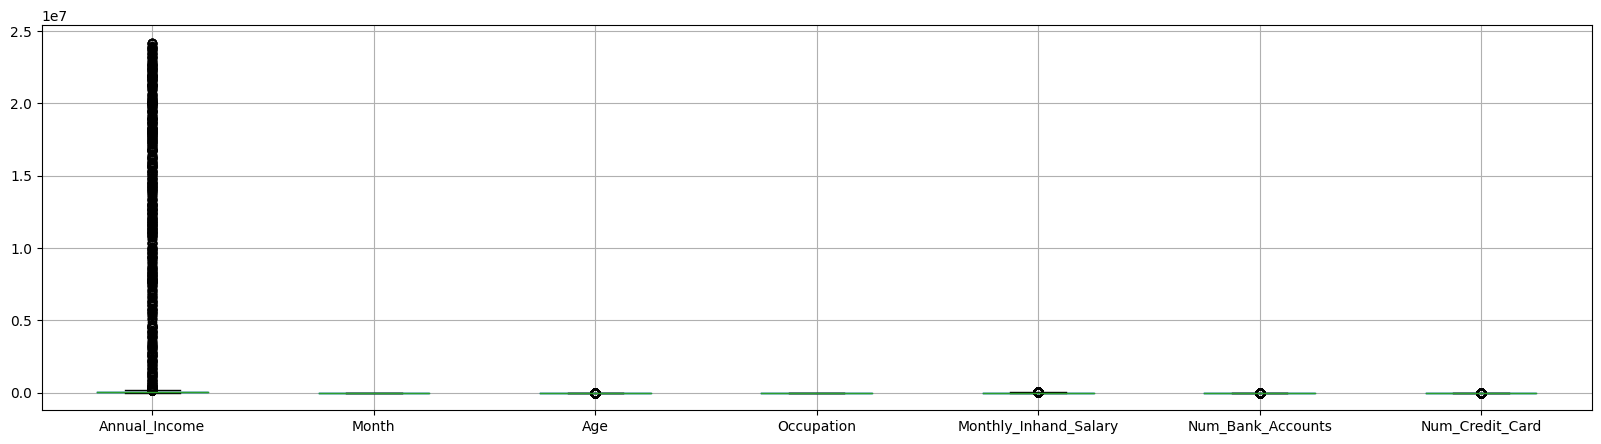

In [ ]:
plt.figure(figsize = (20,5))
customer.boxplot(column = [
'Annual_Income',
'Month',
'Age',
'Occupation',
'Monthly_Inhand_Salary',
'Num_Bank_Accounts',
'Num_Credit_Card'])

<Axes: >

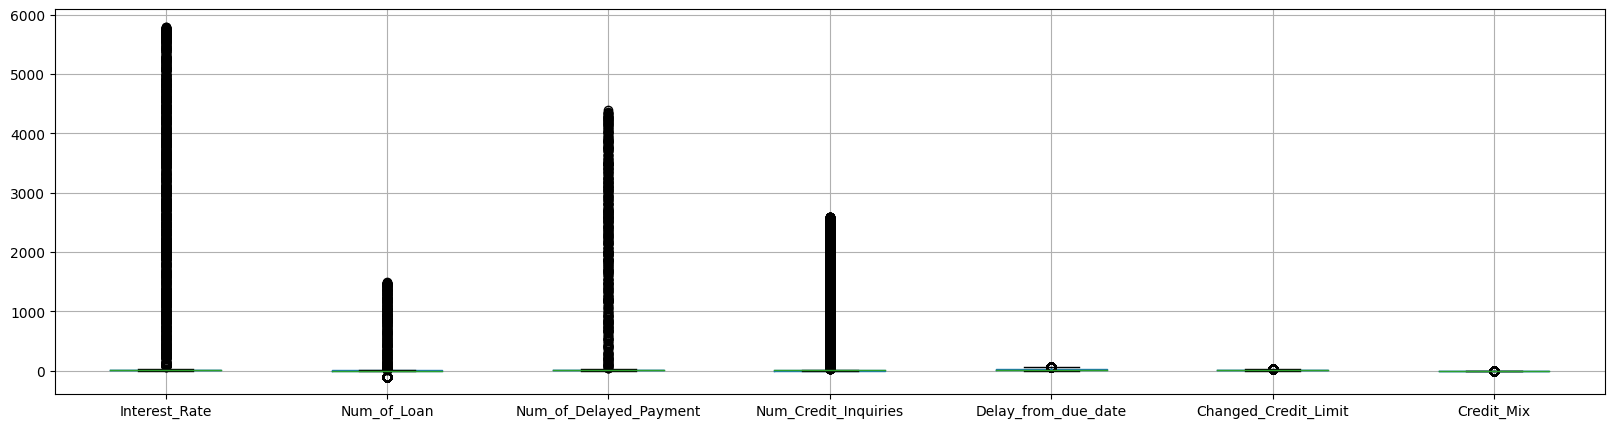

In [ ]:
plt.figure(figsize = (20,5))
customer.boxplot(column = [
'Interest_Rate',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Num_Credit_Inquiries',
'Delay_from_due_date',
'Changed_Credit_Limit',
'Credit_Mix'])

<Axes: >

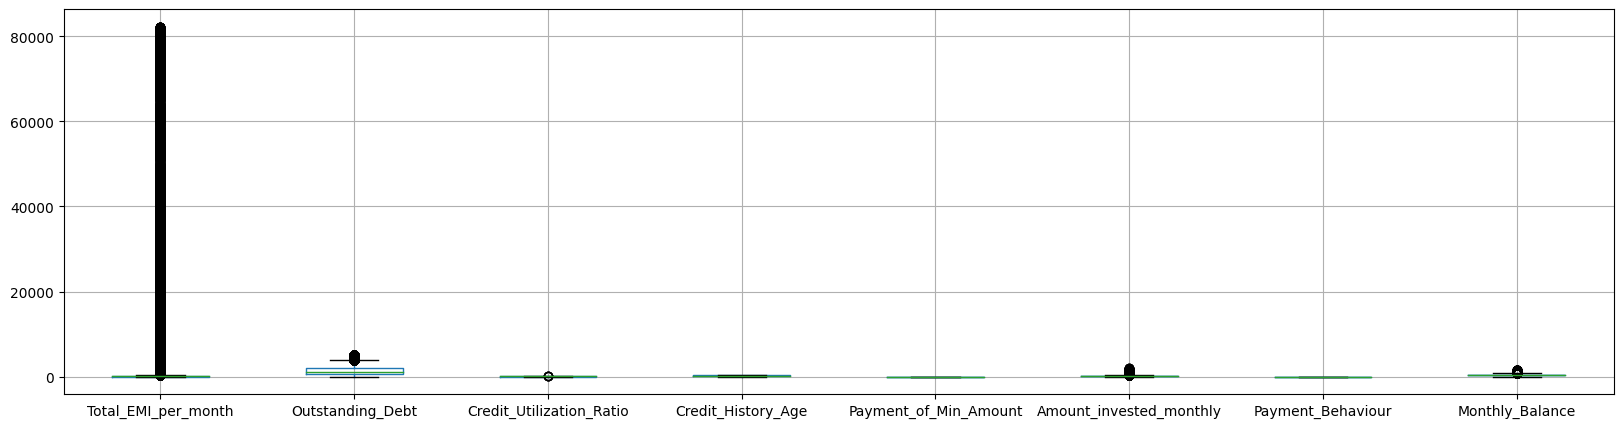

In [ ]:
plt.figure(figsize = (20,5))
customer.boxplot(column = [
'Total_EMI_per_month',
'Outstanding_Debt',
'Credit_Utilization_Ratio',
'Credit_History_Age',
'Payment_of_Min_Amount',
'Amount_invested_monthly',
'Payment_Behaviour',
'Monthly_Balance'])

In [ ]:
customer['Age'] = customer['Age'].apply(lambda x: None if (x < 0 or x > 100) else x)
customer['Num_Bank_Accounts'] = customer['Num_Bank_Accounts'].apply(lambda x: None if x > 10 else x)
customer['Num_Credit_Card'] = customer['Num_Credit_Card'].apply(lambda x: None if x > 10 else x)
customer['Interest_Rate'] = customer['Interest_Rate'].apply(lambda x: None if x > 30 else x)
customer['Num_of_Loan'] = customer['Num_of_Loan'].apply(lambda x: None if x < 0  or x > 10 else x)
customer['Num_of_Delayed_Payment'] = customer['Num_of_Delayed_Payment'].apply(lambda x: None if x > 30 else x)
customer['Num_Credit_Inquiries'] = customer['Num_Credit_Inquiries'].apply(lambda x: None if x > 50 else x)
customer['Total_EMI_per_month'] = customer['Total_EMI_per_month'].apply(lambda x: None if x > 1000 else x)
customer.isnull().sum()

Month                          0
Age                         1970
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts            924
Num_Credit_Card             1608
Interest_Rate               5697
Num_of_Loan                 3133
Delay_from_due_date            0
Num_of_Delayed_Payment       548
Changed_Credit_Limit           0
Num_Credit_Inquiries        1150
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month         2351
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [ ]:
customer = customer.dropna()

In [ ]:
customer.shape

(53464, 23)

<Axes: >

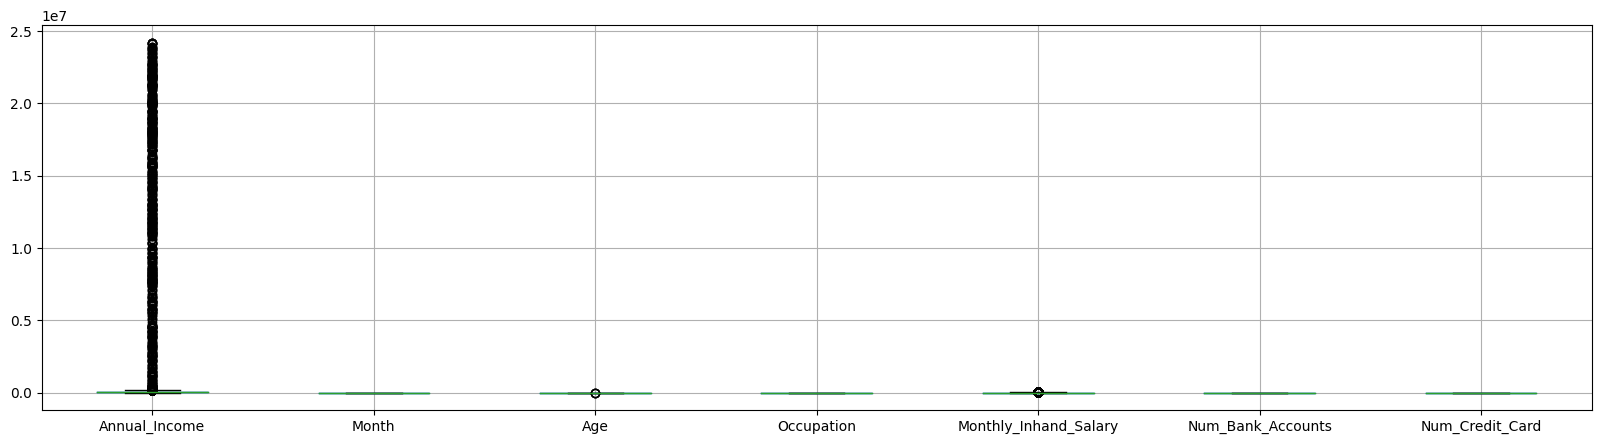

In [ ]:
plt.figure(figsize = (20,5))
customer.boxplot(column = [
'Annual_Income',
'Month',
'Age',
'Occupation',
'Monthly_Inhand_Salary',
'Num_Bank_Accounts',
'Num_Credit_Card'])

<Axes: >

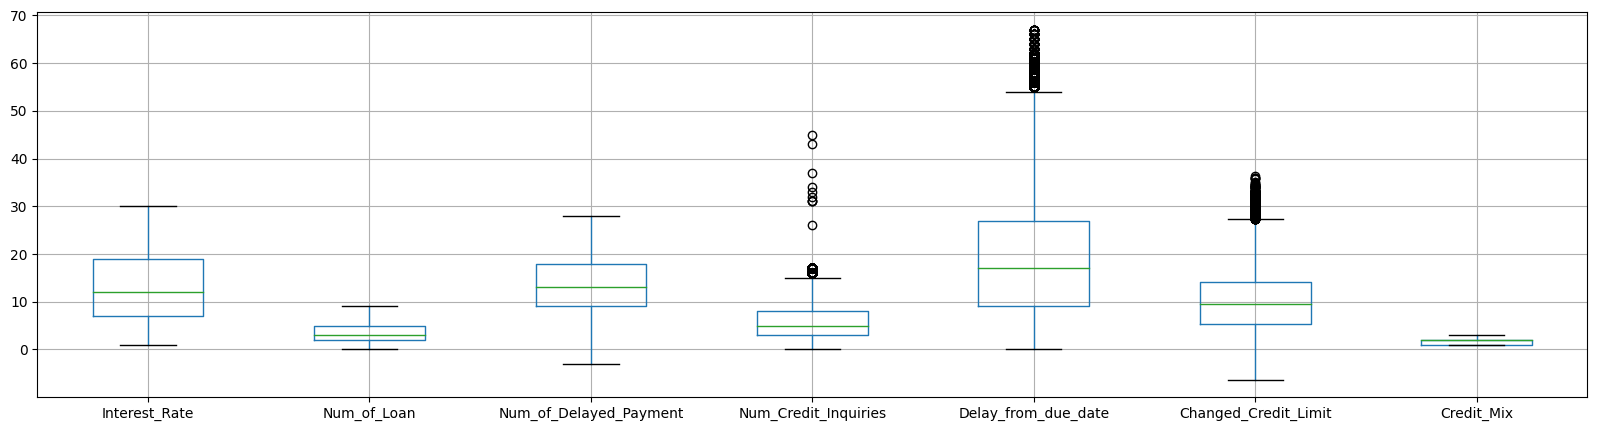

In [ ]:
plt.figure(figsize = (20,5))
customer.boxplot(column = [
'Interest_Rate',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Num_Credit_Inquiries',
'Delay_from_due_date',
'Changed_Credit_Limit',
'Credit_Mix'])

<Axes: >

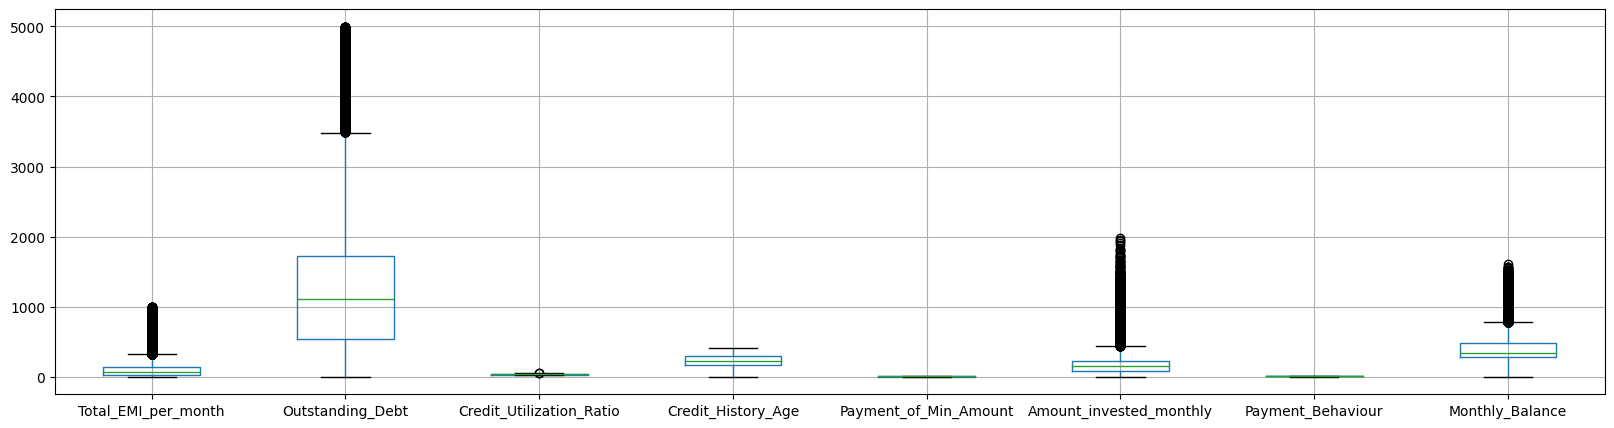

In [ ]:
plt.figure(figsize = (20,5))
customer.boxplot(column = [
'Total_EMI_per_month',
'Outstanding_Debt',
'Credit_Utilization_Ratio',
'Credit_History_Age',
'Payment_of_Min_Amount',
'Amount_invested_monthly',
'Payment_Behaviour',
'Monthly_Balance'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
X = customer.drop(columns=["Credit_Score"])
y = customer['Credit_Score']

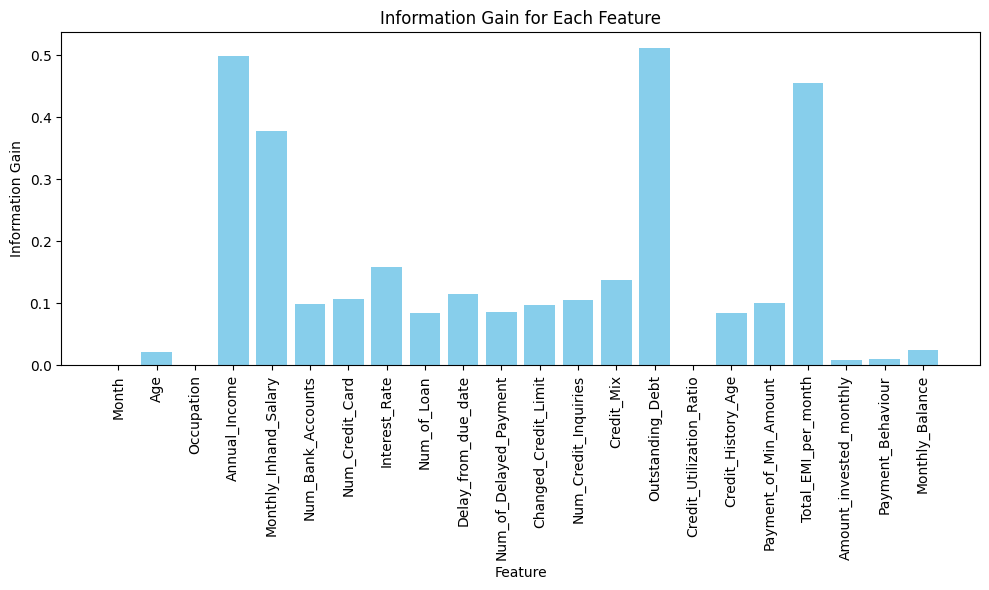

In [ ]:
from sklearn.feature_selection import mutual_info_classif

information_gain = mutual_info_classif(X, y, random_state=1)
plt.figure(figsize=(10, 6))
plt.bar(range(len(information_gain)), information_gain, color='skyblue')
plt.xticks(range(len(information_gain)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.title('Information Gain for Each Feature')
plt.tight_layout()
plt.show()

In [ ]:
X = X.drop(columns = ['Month', 'Occupation', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Payment_Behaviour', 'Age', 'Monthly_Balance'])

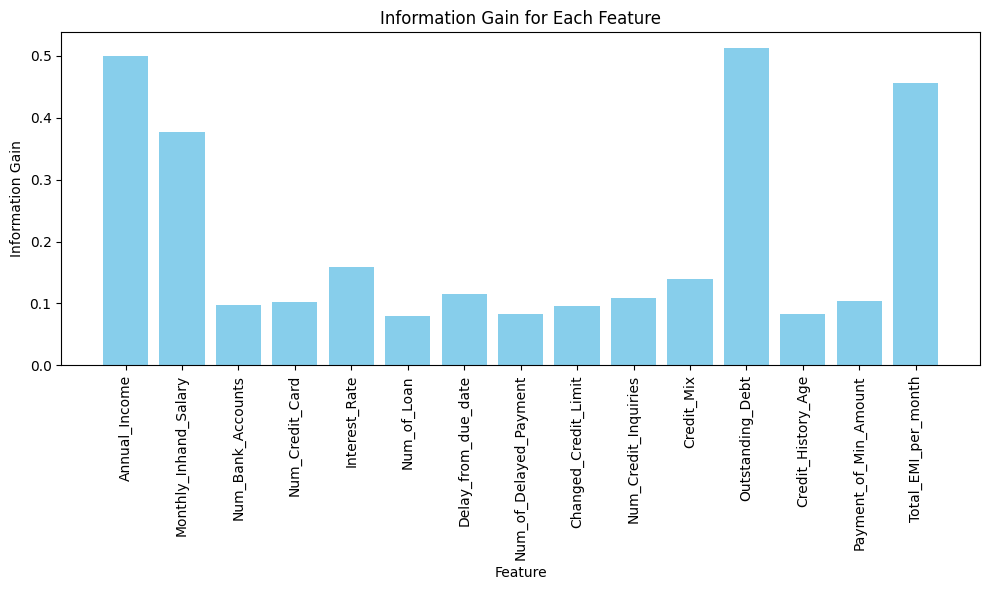

In [ ]:
information_gain = mutual_info_classif(X, y, random_state=1)
plt.figure(figsize=(10, 6))
plt.bar(range(len(information_gain)), information_gain, color='skyblue')
plt.xticks(range(len(information_gain)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.title('Information Gain for Each Feature')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

K-Nearest Neighbors:
Accuracy: 72.57%
Precision: 72.82%
Recall: 72.57%
F1 Score: 72.62%
Confusion Matrix:


<Axes: >

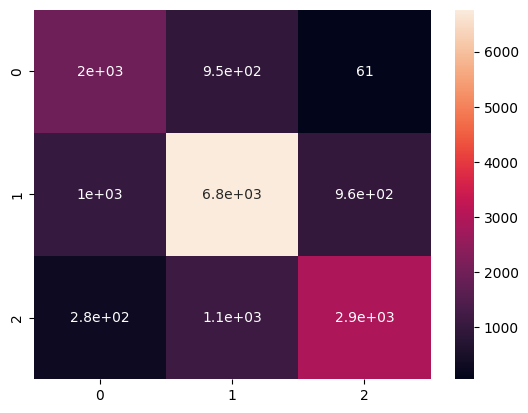

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_accuracy = (accuracy_score(y_test, y_pred_knn)*100).round(2)

print("K-Nearest Neighbors:")
print(f"Accuracy: {knn_accuracy}%")
print(f"Precision: {(precision_score(y_test, y_pred_knn,average='weighted')*100).round(2)}%")
print(f"Recall: {(recall_score(y_test, y_pred_knn,average='weighted')*100).round(2)}%")
print(f"F1 Score: {(f1_score(y_test, y_pred_knn,average='weighted')*100).round(2)}%")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True)

Decision Tree Classifier:
Accuracy: 70.63%
Precision: 70.63%
Recall: 70.63%
F1 Score: 70.63%
Confusion Matrix:


<Axes: >

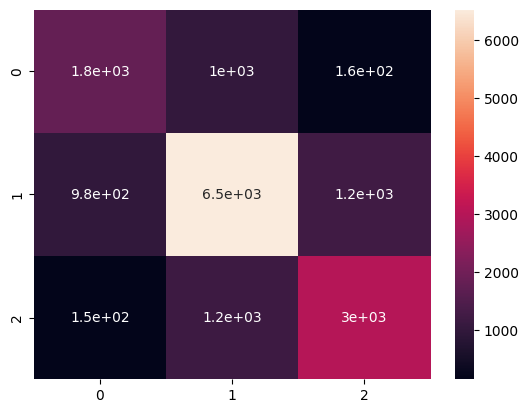

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

dt_accuracy = (accuracy_score(y_test, y_pred_dt)*100).round(2)

print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}%")
print(f"Precision: {(precision_score(y_test, y_pred_dt,average='weighted')*100).round(2)}%")
print(f"Recall: {(recall_score(y_test, y_pred_dt,average='weighted')*100).round(2)}%")
print(f"F1 Score: {(f1_score(y_test, y_pred_dt,average='weighted')*100).round(2)}%")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)

Random Forest Classifier:
Accuracy: 77.55%
Precision:77.5%
Recall: 77.55%
F1 Score: 77.52%
Confusion Matrix:


<Axes: >

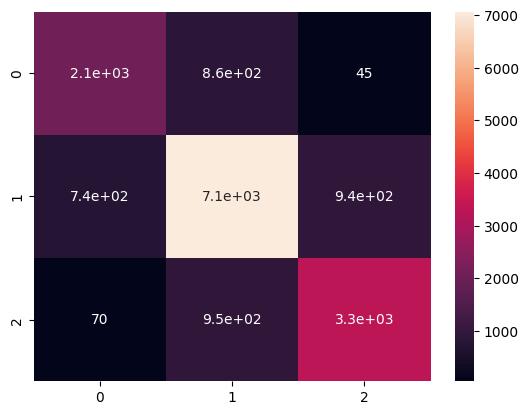

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

rf_accuracy = (accuracy_score(y_test, y_pred_rf)*100).round(2)

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}%")
print(f"Precision:{(precision_score(y_test, y_pred_rf,average='weighted')*100).round(2)}%")
print(f"Recall: {(recall_score(y_test, y_pred_rf,average='weighted')*100).round(2)}%")
print(f"F1 Score: {(f1_score(y_test, y_pred_rf,average='weighted')*100).round(2)}%")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

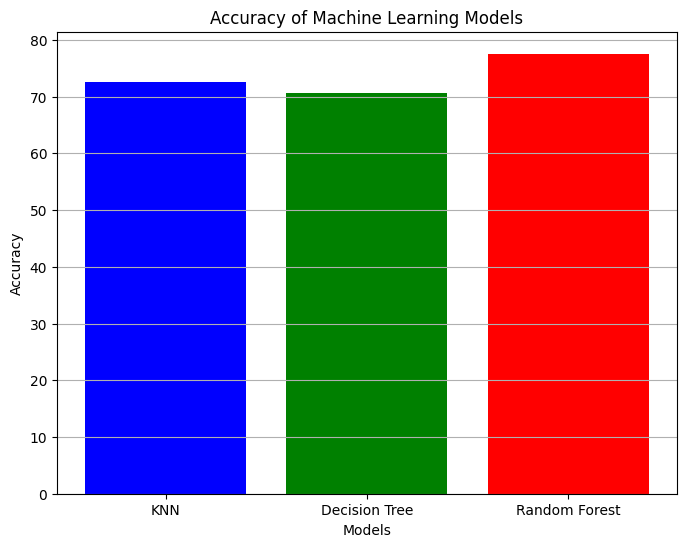

In [ ]:
models = ['KNN', 'Decision Tree', 'Random Forest']

accuracies = [knn_accuracy, dt_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y')

plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

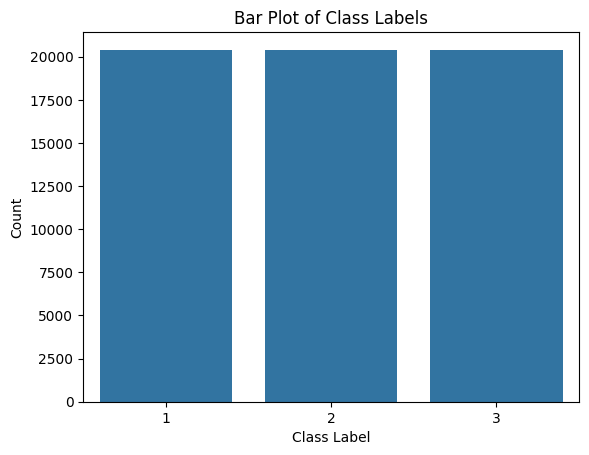

In [ ]:
new_df = pd.DataFrame(X_train_resampled, columns=X.columns)
new_df['Credit_Score'] = y_train_resampled

sns.countplot(x='Credit_Score', data=new_df)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Bar Plot of Class Labels')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

K-Nearest Neighbors:
Accuracy: 65.01%
Precision: 64.91%
Recall: 65.01%
F1 Score: 64.89%
Confusion Matrix:


<Axes: >

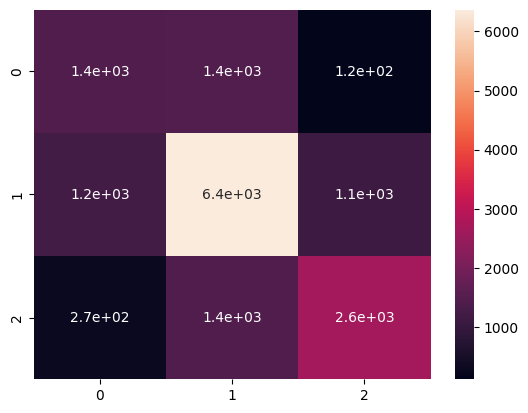

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_accuracy = (accuracy_score(y_test, y_pred_knn)*100).round(2)

print("K-Nearest Neighbors:")
print(f"Accuracy: {knn_accuracy}%")
print(f"Precision: {(precision_score(y_test, y_pred_knn,average='weighted')*100).round(2)}%")
print(f"Recall: {(recall_score(y_test, y_pred_knn,average='weighted')*100).round(2)}%")
print(f"F1 Score: {(f1_score(y_test, y_pred_knn,average='weighted')*100).round(2)}%")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True)

Decision Tree Classifier:
Accuracy: 70.67%
Precision: 70.68%
Recall: 70.67%
F1 Score: 70.67%
Confusion Matrix:


<Axes: >

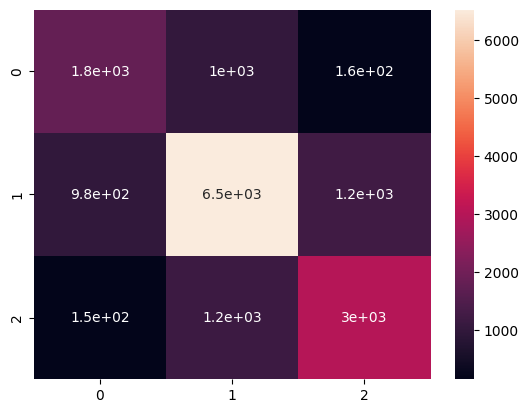

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

dt_accuracy = (accuracy_score(y_test, y_pred_dt)*100).round(2)

print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}%")
print(f"Precision: {(precision_score(y_test, y_pred_dt,average='weighted')*100).round(2)}%")
print(f"Recall: {(recall_score(y_test, y_pred_dt,average='weighted')*100).round(2)}%")
print(f"F1 Score: {(f1_score(y_test, y_pred_dt,average='weighted')*100).round(2)}%")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)

Random Forest Classifier:
Accuracy: 77.56%
Precision:77.51%
Recall: 77.56%
F1 Score: 77.53%
Confusion Matrix:


<Axes: >

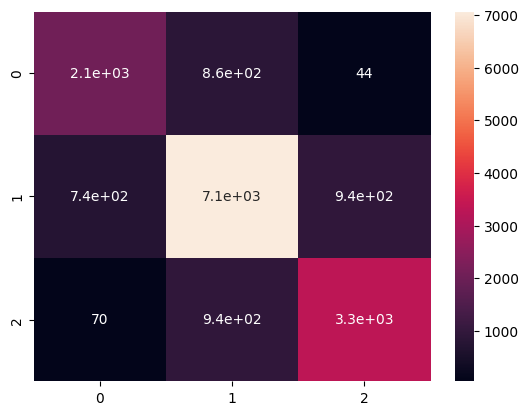

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

rf_accuracy = (accuracy_score(y_test, y_pred_rf)*100).round(2)

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}%")
print(f"Precision:{(precision_score(y_test, y_pred_rf,average='weighted')*100).round(2)}%")
print(f"Recall: {(recall_score(y_test, y_pred_rf,average='weighted')*100).round(2)}%")
print(f"F1 Score: {(f1_score(y_test, y_pred_rf,average='weighted')*100).round(2)}%")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

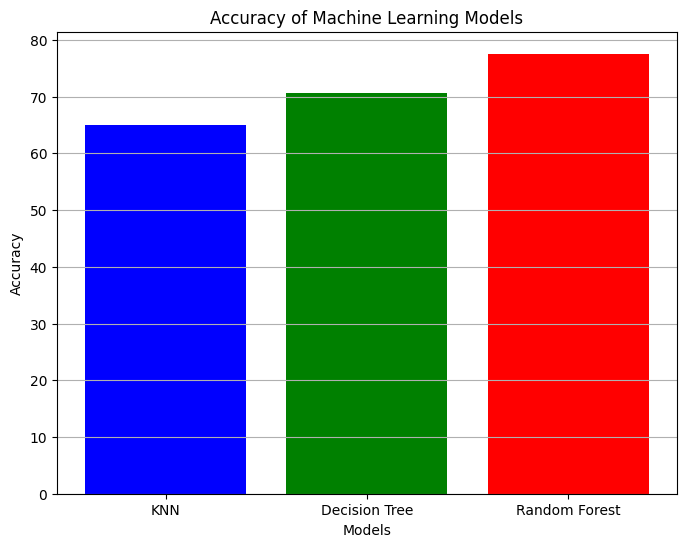

In [ ]:
models = ['KNN', 'Decision Tree', 'Random Forest']

accuracies = [knn_accuracy, dt_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y')

plt.show()